In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
import functions

from sklearn.model_selection import train_test_split
from functions import make_dataframe, ML, THRESHOLD

window_sizes = [10,20,30,60,80,120,240]
window_size = [60]
stride = 0.33333333

# for w in window_size:
#     STRIDE = int(w * stride)
#     KN = []
#     LGBM = []
#     DTC = []
#     RFC = []

#     for epoch in range(10):
#         df, _ = functions.make_dataframe(w, STRIDE)
#         X = df.iloc[:, :9].values
#         y = df['label'].values
#         X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
#         print(f"{epoch+1} Epochs...")
#         kn_ac, lgbm_ac, dtc_ac, clf_ac = ML(X_train, X_test, y_train, y_test)

#         KN.append(kn_ac)
#         LGBM.append(lgbm_ac)
#         DTC.append(dtc_ac)
#         RFC.append(clf_ac)

#     print("Window size : ", w, "Stride : ", STRIDE)
#     print("KN = ", KN)
#     print("LGBM = ", LGBM)
#     print("DTC = ", DTC)
#     print("RFC = ", RFC)

#     thres_X = df['MEAN_TEMP'].values
#     thres_Y = df['label'].values
#     print(accuracy_score(list(map(THRESHOLD, thres_X)), thres_Y))


In [30]:
from functions import make_dataframe, ML, THRESHOLD

df, df_temp_all = make_dataframe(60, 20)

In [31]:
df

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label
0,284.174,1.466831,281.401,287.082,0.273302,-0.938145,283.754,283.220,285.415,1
1,283.417,0.832332,281.401,285.439,0.167324,0.698825,283.408,283.046,283.803,1
2,284.153,1.006652,282.463,286.597,0.787491,-0.240354,283.808,283.442,284.841,1
3,284.210,1.050080,282.354,286.597,0.380891,-0.499881,283.951,283.455,284.948,1
4,284.175,1.081684,282.258,286.597,0.305962,-0.501457,283.938,283.430,284.929,1
...,...,...,...,...,...,...,...,...,...,...
33237,864.625,0.230096,863.907,865.085,-0.645255,1.496794,864.652,864.446,864.760,11
33238,864.768,0.251631,863.907,865.147,-1.304570,2.546230,864.790,864.633,864.968,11
33239,864.904,0.143626,864.551,865.147,-0.905184,0.215877,864.943,864.819,865.005,11
33240,864.966,0.071922,864.792,865.147,-0.044408,0.501827,864.970,864.916,865.006,11


In [32]:
import torch.nn as nn
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

    
model = LSTM(1,4,1)
model.to(device)
lr = 0.001
num_epochs = 50
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = lr)
batch_size = 512

def train_one_epoch():
    model.train(True)
    print(f"Epoch : {epoch + 1}")
    training_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(X_batch)
        loss = criterion(output, y_batch)
        training_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 1000 == 999:
            #avg_loss_cross_batches = training_loss / 1000
            #print("Batch {0}, Training Loss : {1}".format(batch_size+1, loss))
            pass
        training_loss = 0.0

def validate_one_epoch():
    model.train(False)
    validation_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(X_batch)
            loss = criterion(output, y_batch)
            validation_loss += loss.item()

    avg_loss_across_batches = validation_loss / len(test_loader)

    #print('Val loss : {0}'.format(avg_loss_across_batches))

lookback size :  10
back
Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10
Epoch : 11
Epoch : 12
Epoch : 13
Epoch : 14
Epoch : 15
Epoch : 16
Epoch : 17
Epoch : 18
Epoch : 19
Epoch : 20
Epoch : 21
Epoch : 22
Epoch : 23
Epoch : 24
Epoch : 25
Epoch : 26
Epoch : 27
Epoch : 28
Epoch : 29
Epoch : 30
Epoch : 31
Epoch : 32
Epoch : 33
Epoch : 34
Epoch : 35
Epoch : 36
Epoch : 37
Epoch : 38
Epoch : 39
Epoch : 40
Epoch : 41
Epoch : 42
Epoch : 43
Epoch : 44
Epoch : 45
Epoch : 46
Epoch : 47
Epoch : 48
Epoch : 49
Epoch : 50
***********************************************


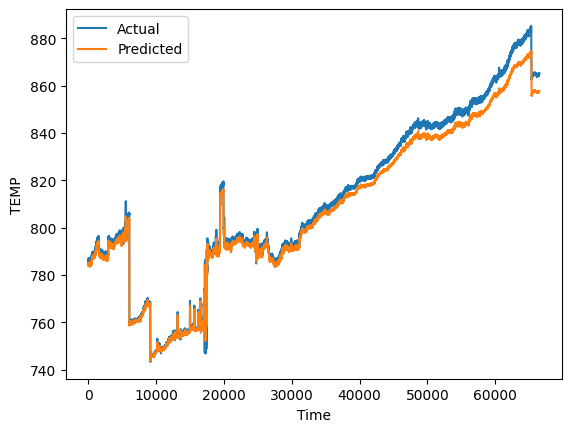

0.9875734415075558
3.135561195921646
16.07415951292487


In [33]:
from deeplearning_function import DEEPLEARNING, plot_prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

lookback_list = [100]
FB_list = ['back']
for lookback in lookback_list:
    for fb in FB_list:
        train_loader, test_loader, X_test, y_test = DEEPLEARNING(df_temp_all, lookback, batch_size = batch_size, front_or_back=fb)
        print("lookback size : ", lookback)
        print(fb)
        for epoch in range(num_epochs):
            train_one_epoch()
            validate_one_epoch()
            
        print("***********************************************")
        test_predictions, new_y_test = plot_prediction(model, X_test, y_test, lookback)

        plt.plot(new_y_test, label='Actual')
        plt.plot(test_predictions, label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('TEMP')
        plt.legend()
        plt.show()
        print(r2_score(new_y_test, test_predictions))
        print(mean_absolute_error(new_y_test, test_predictions))
        print(mean_squared_error(new_y_test, test_predictions))

In [34]:
test_predictions
test_predictions = pd.DataFrame({'TEMP' : test_predictions})
test_predictions

,TEMP
0,783.789223
1,783.887663
2,784.013917
3,784.134202
4,784.237616
...,...
66474,857.646863
66475,857.655241
66476,857.663123
66477,857.676590


In [39]:
temp_10 = test_predictions[:6042]
temp_11 = test_predictions[6042:].reset_index(drop = True)
len(temp_10), len(temp_11)

(6042, 60437)

In [44]:
label_10 = pd.DataFrame({'label' : [1] * 6042})
label_11 = pd.DataFrame({'label' : [2] * 60437})
temp_1 = pd.concat([temp_10, label_10], axis = 1)
temp_2 = pd.concat([temp_11, label_11], axis = 1)
temp_1

,TEMP,label
0,783.789223,1
1,783.887663,1
2,784.013917,1
3,784.134202,1
4,784.237616,1
...,...,...
6037,803.532603,1
6038,803.530614,1
6039,803.532489,1
6040,803.532030,1


In [45]:
temp_2

,TEMP,label
0,803.597108,2
1,803.650287,2
2,800.930168,2
3,797.565007,2
4,793.679679,2
...,...,...
60432,857.646863,2
60433,857.655241,2
60434,857.663123,2
60435,857.676590,2


In [46]:
TEST = pd.concat([temp_1, temp_2], axis = 0).reset_index(drop = True)
TEST

,TEMP,label
0,783.789223,1
1,783.887663,1
2,784.013917,1
3,784.134202,1
4,784.237616,1
...,...,...
66474,857.646863,2
66475,857.655241,2
66476,857.663123,2
66477,857.676590,2


In [47]:
data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'label' : []}

for j in range(0,len(temp_1),20):
    temp = temp_1['TEMP'][j:j+60]
    MEAN = np.round(np.mean(temp), 3)
    MIN = np.min(temp)
    MAX = np.max(temp)
    STD = np.std(temp)
    median = temp.median()
    skew = temp.skew()
    kurt = temp.kurt()
    a, b = np.percentile(temp, q = [25,75])

    data['label'].append(10)
    data['MEAN_TEMP'].append(MEAN)
    data['MIN'].append(MIN)
    data['MAX'].append(MAX)
    data['STD'].append(STD)
    data['SKEW'].append(skew)
    data['KURT'].append(kurt)
    data['MEDIAN'].append(np.round(median,3))
    data['25%'].append(np.round(a,3))
    data['75%'].append(np.round(b,3))

df_test_1 = pd.DataFrame(data)
df_test_1 = df_test_1.dropna(axis = 0).reset_index(drop = True)
df_test_1

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label
0,784.659,0.295533,783.789223,785.147064,-0.788702,0.603759,784.704,784.509,784.866,10
1,784.770,0.223788,784.285516,785.147064,-0.346681,-0.615493,784.777,784.620,784.928,10
2,784.762,0.237463,784.322053,785.147064,-0.095896,-1.083824,784.763,784.574,784.979,10
3,784.750,0.238699,784.311111,785.083708,-0.365137,-1.098011,784.791,784.574,784.959,10
4,784.661,0.246085,784.158305,785.075329,-0.048262,-0.959155,784.650,784.486,784.860,10
...,...,...,...,...,...,...,...,...,...,...
297,803.756,0.199604,803.351028,804.066313,-0.604464,-0.436795,803.785,803.666,803.912,10
298,803.715,0.233499,803.314911,804.066313,-0.353079,-1.255708,803.785,803.433,803.912,10
299,803.615,0.244390,803.281779,804.066313,0.386982,-1.205136,803.563,803.397,803.812,10
300,803.469,0.127545,803.281779,803.718082,0.454629,-0.950100,803.418,803.371,803.560,10


In [48]:
data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'label' : []}

for j in range(0,len(temp_2),20):
    temp = temp_2['TEMP'][j:j+60]
    MEAN = np.round(np.mean(temp), 3)
    MIN = np.min(temp)
    MAX = np.max(temp)
    STD = np.std(temp)
    median = temp.median()
    skew = temp.skew()
    kurt = temp.kurt()
    a, b = np.percentile(temp, q = [25,75])

    data['label'].append(11)
    data['MEAN_TEMP'].append(MEAN)
    data['MIN'].append(MIN)
    data['MAX'].append(MAX)
    data['STD'].append(STD)
    data['SKEW'].append(skew)
    data['KURT'].append(kurt)
    data['MEDIAN'].append(np.round(median,3))
    data['25%'].append(np.round(a,3))
    data['75%'].append(np.round(b,3))

df_test_2 = pd.DataFrame(data)
df_test_2 = df_test_2.dropna(axis = 0).reset_index(drop = True)
df_test_2

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label
0,764.216,12.317843,758.706876,803.650287,2.347507,4.166524,759.206,758.990,759.354,11
1,759.180,0.134025,758.922655,759.492480,-0.041238,-0.637875,759.188,759.084,759.272,11
2,759.305,0.204092,759.013902,759.825446,1.121558,0.544069,759.248,759.164,759.388,11
3,759.371,0.261730,759.013902,759.828736,0.515471,-1.204277,759.271,759.163,759.611,11
4,759.496,0.249166,759.038005,759.828736,-0.390228,-1.299785,759.583,759.264,759.722,11
...,...,...,...,...,...,...,...,...,...,...
3017,857.347,0.115470,857.109136,857.562579,-0.428151,-0.873492,857.384,857.252,857.444,11
3018,857.461,0.172286,857.109136,857.722806,-0.189232,-0.856890,857.448,857.359,857.624,11
3019,857.562,0.154061,857.109136,857.722806,-1.200349,0.569491,857.641,857.426,857.670,11
3020,857.663,0.032269,857.580905,857.722806,-0.291485,-0.074251,857.664,857.643,857.685,11


In [49]:
df_test = pd.concat([df_test_1, df_test_2], axis = 0)
df_test = df_test.reset_index(drop = True)
df_test

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label
0,784.659,0.295533,783.789223,785.147064,-0.788702,0.603759,784.704,784.509,784.866,10
1,784.770,0.223788,784.285516,785.147064,-0.346681,-0.615493,784.777,784.620,784.928,10
2,784.762,0.237463,784.322053,785.147064,-0.095896,-1.083824,784.763,784.574,784.979,10
3,784.750,0.238699,784.311111,785.083708,-0.365137,-1.098011,784.791,784.574,784.959,10
4,784.661,0.246085,784.158305,785.075329,-0.048262,-0.959155,784.650,784.486,784.860,10
...,...,...,...,...,...,...,...,...,...,...
3319,857.347,0.115470,857.109136,857.562579,-0.428151,-0.873492,857.384,857.252,857.444,11
3320,857.461,0.172286,857.109136,857.722806,-0.189232,-0.856890,857.448,857.359,857.624,11
3321,857.562,0.154061,857.109136,857.722806,-1.200349,0.569491,857.641,857.426,857.670,11
3322,857.663,0.032269,857.580905,857.722806,-0.291485,-0.074251,857.664,857.643,857.685,11


In [104]:
df

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label
0,284.174,1.466831,281.401,287.082,0.273302,-0.938145,283.754,283.220,285.415,1
1,283.417,0.832332,281.401,285.439,0.167324,0.698825,283.408,283.046,283.803,1
2,284.153,1.006652,282.463,286.597,0.787491,-0.240354,283.808,283.442,284.841,1
3,284.210,1.050080,282.354,286.597,0.380891,-0.499881,283.951,283.455,284.948,1
4,284.175,1.081684,282.258,286.597,0.305962,-0.501457,283.938,283.430,284.929,1
...,...,...,...,...,...,...,...,...,...,...
33237,864.625,0.230096,863.907,865.085,-0.645255,1.496794,864.652,864.446,864.760,11
33238,864.768,0.251631,863.907,865.147,-1.304570,2.546230,864.790,864.633,864.968,11
33239,864.904,0.143626,864.551,865.147,-0.905184,0.215877,864.943,864.819,865.005,11
33240,864.966,0.071922,864.792,865.147,-0.044408,0.501827,864.970,864.916,865.006,11


In [5]:
RANDOM = df.sample(33242)['MEAN_TEMP'].values

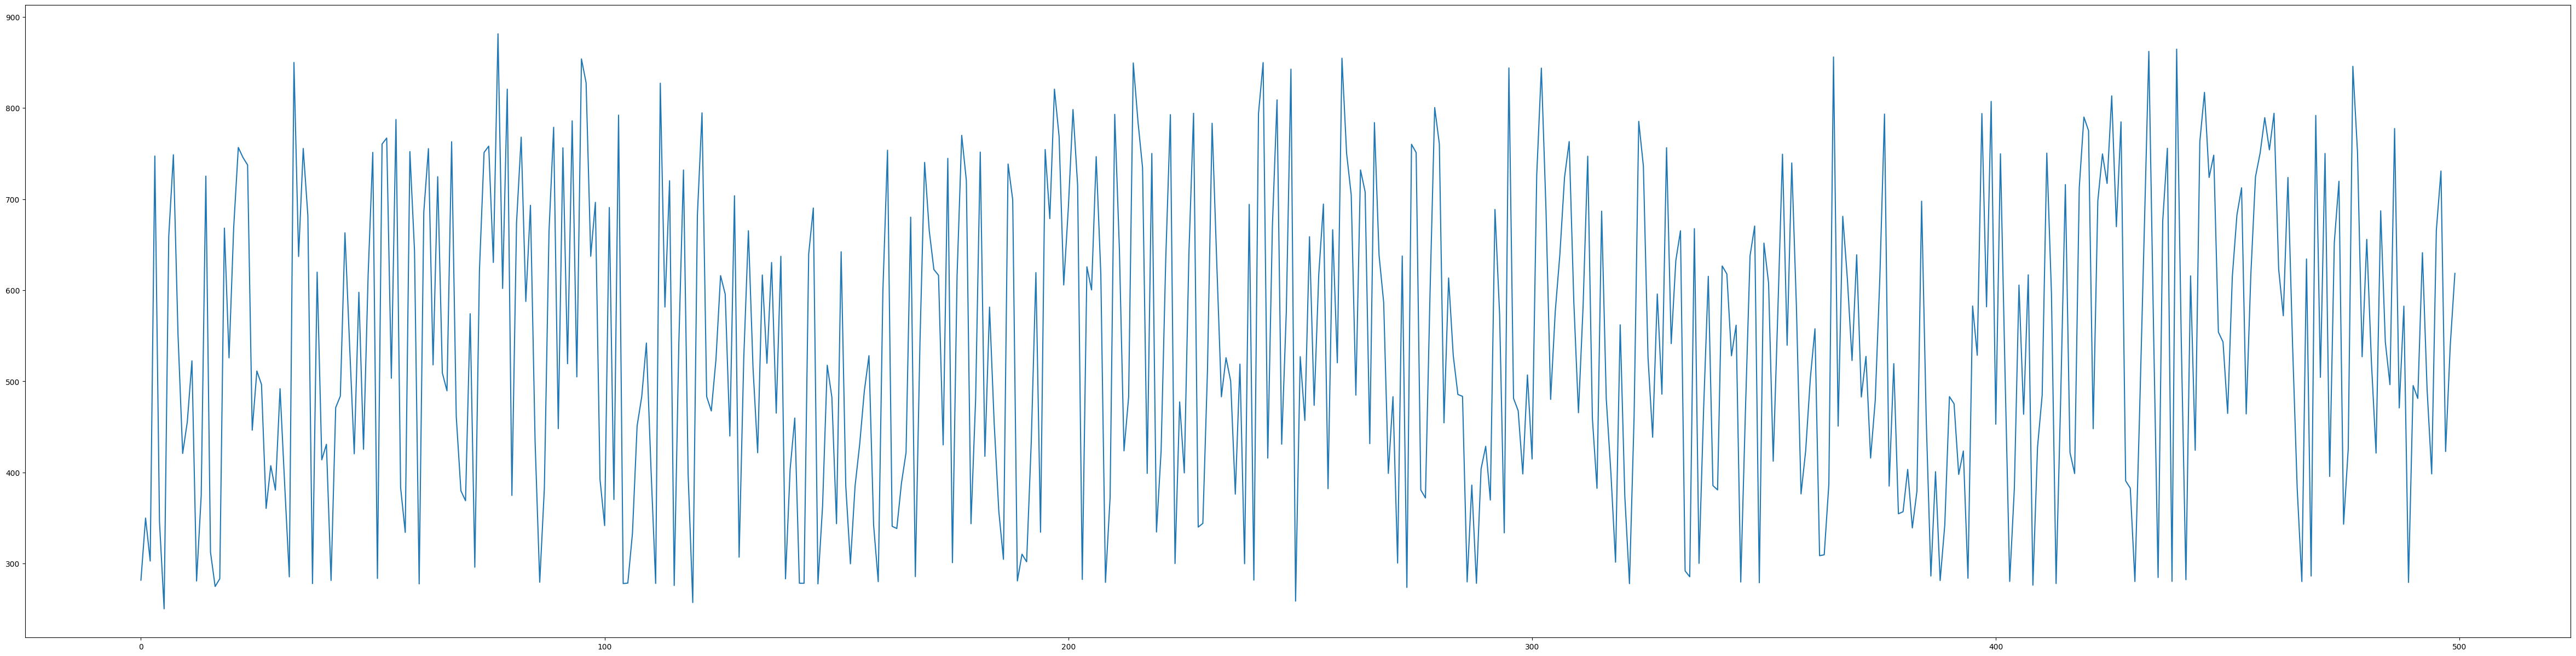

In [28]:
plt.figure(figsize=(60,15))
sns.lineplot(x = np.arange(500), y = RANDOM[:500])
plt.show()

In [105]:
X_train = df.iloc[:, :9].values
y_train = df.iloc[:, 9].values
X_test = df_test.iloc[:, :9].values
y_test = df_test.iloc[:, 9].values


In [106]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 100)
lgbm.fit(X_train, y_train,
                eval_metric = 'multi_logloss',
                eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print("LGBM ", accuracy_score(y_test, lgbm_predict))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KN", accuracy_score(y_test, knn_pred))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("DTC", accuracy_score(y_test, dtc_pred))

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth = 50)
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
print("RFC", accuracy_score(clf_predict, y_test))

X = df_test['MEAN_TEMP'].values
Y = df_test['label'].values

predict = list(map(THRESHOLD, X))
print(accuracy_score(predict, Y))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 33242, number of used features: 9
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
LGBM  0.910950661853189
KN 0.9070397111913358
DTC 0.8880866425992779
RFC 0.9115523465703971
0.09085439229843562


# 시나리오

### #1 구간 1 -> 구간 6 -> 구간 7

In [107]:
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
664791,865.029,664791
664792,864.985,664792
664793,865.048,664793
664794,865.040,664794
